In [1]:
## Imports

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.ticker import MaxNLocator, LogLocator
from matplotlib import cm
import h5py
import os
from mpl_toolkits.mplot3d import axes3d
from cycler import cycler
from scipy.interpolate import griddata
import matplotlib.patches as patches
from math import pi, sqrt
from scipy.optimize import curve_fit
import scipy
from matplotlib.colors import LinearSegmentedColormap
import random
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

In [2]:
## Helper functions

def CutTimes(time, data, TLow, TUp): ###
    TLowIndex = np.where(time >= TLow)[0][0]
    TUpIndex = np.where(time <= TUp)[0][-1]
    time = time[TLowIndex:TUpIndex]
    data = data[TLowIndex:TUpIndex]
    return time, data

In [ ]:
## Plot constraints

def PlotConstraintViolation(p, spin, figname, norm=True):
    
    levs = ['0','1','2']
    labels = ['Low', 'Med','High']
    def GetFilename(lev):
        return p + '/JoinedSpin' + spin + 'Lev' + lev + '/hConstraints.dat'
    
    fig, ax = plt.subplots(4, sharex=True, figsize=(8,12))
    ## Overall denominator
    Normtime, NormD = np.loadtxt(GetFilename(levs[-1]), comments="#",usecols=([0,5]),unpack=True)
    
    cmap = matplotlib.cm.get_cmap('viridis')
    Colors = [cmap(float(i)/(len(levs))) for i in range(len(levs))]
    Colors = Colors[::-1]
    Linestyles = ['-.', '--', '-']
    
    lw = 3
    ms = 3
    
    for lev, lab, c, ls in zip(levs, labels, Colors, Linestyles):
        time, con1, con3, con2, con4, D = np.loadtxt(GetFilename(lev), \
                                                          comments="#",usecols=([0,1,2,3,4,5]),unpack=True)

        if norm:
            con1 = np.divide(con1, D)
            con2 = np.divide(con2, D)
            con3 = np.divide(con3, D)
            con4 = np.divide(con4, D)
        
        ax[0].plot(time, np.abs(con1), '-', label = lab, c=c, lw=lw, ls=ls)
        ax[1].plot(time, np.abs(con2), '-', label = lab, c=c, lw=lw, ls=ls)
        ax[2].plot(time, np.abs(con3), '-', label = lab, c=c, lw=lw, ls=ls)
        ax[3].plot(time, np.abs(con4), '-', label = lab, c=c, lw=lw, ls=ls)
        
    ax[0].set_ylabel('$\|\Delta C_\mathrm{1}\|/\|N_1\|$')
    ax[1].set_ylabel('$\|\Delta C_\mathrm{2}\|/\|N_2\|$')
    ax[2].set_ylabel('$\|\Delta C_\mathrm{3}\|/\|N_3\|$')
    ax[3].set_ylabel('$\|\Delta C_\mathrm{4}\|/\|N_4\|$')
                                
    for a in ax:
        a.set_yscale('log')
        
    leg = ax[0].legend(fontsize=20,framealpha=1.0, loc='lower left')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(3.0)
    #ax[-1].set_xlim(0, 0.5)
    ax[-1].set_xlabel('$t/M$')
    plt.subplots_adjust(hspace=0.0)
    plt.tight_layout()
    plt.savefig(figname)
    plt.show()
    
PlotConstraintViolation('Runs_10000', '0.6', 'Test.pdf', norm=True)


In [6]:
## Plot field variables


def PlotMetric(p, spin, figname):
    
    levs = ['0','1','2']
    labels = ['Low', 'Med','High']
    
    def GetFilename(lev):
        return p + '/JoinedSpin' + spin + 'Lev' + lev + '/Vars.dat'
    
    fig, ax = plt.subplots(1, figsize=(8,4))
    
    cmap = matplotlib.cm.get_cmap('magma')
    Colors = [cmap(float(i)/(len(levs))) for i in range(len(levs))]
    Colors = Colors[::-1]
    
    Linestyles = ['-.', '--', '-']
    
    for lev, lab, c, ls in zip(levs, labels, Colors, Linestyles):
        time, psi = np.loadtxt(GetFilename(lev), comments="#",usecols=([0,1]),unpack=True)
        
        ## Divide by the factor of 8 in the definition of delta psi_ab for dCS
        ##psi = psi / 8.0
        
        print(time[-1])
        time, psi = CutTimes(time, psi, 100, 4200)

        ax.plot(time, np.abs(psi), '-', label = lab, c=c, ls=ls)
  
    ax.set_ylabel(r'$(\alpha_\mathrm{GB})^{-2}  \|g_{ab}^{(2)} \| $')
    leg = ax.legend(fontsize=16,framealpha=1.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    ax.set_xlabel('$t/M$')

    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

9700.0
6300.0
4200.0


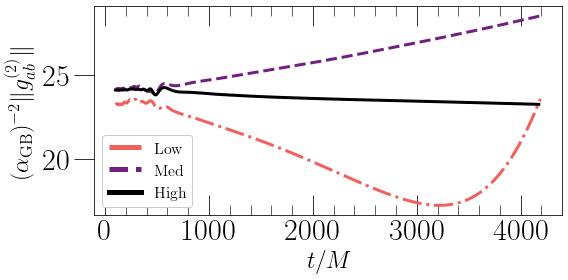

3250.0
2250.0
1450.0


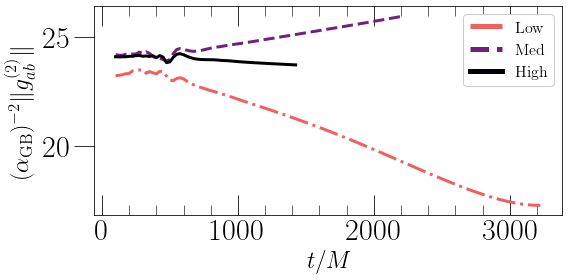

3250.0
2125.0
1475.0


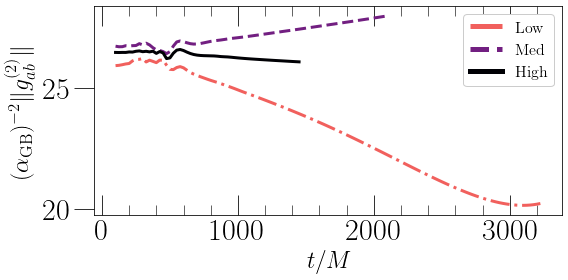

1950.0
1175.0
700.0


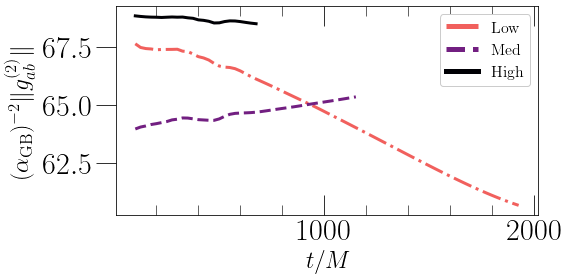

In [7]:
PlotMetric('Runs_Correct_ScalarField', '0.1', 'dtg_0p1.pdf')
PlotMetric('Runs_Correct_ScalarField', '0', 'dtg_0.pdf')
PlotMetric('Runs_Correct_ScalarField', '0.6', 'dtg_0p6.pdf')
PlotMetric('Runs_Correct_ScalarField', '0.9', 'dtg_0p9.pdf')

In [31]:
## Plot time derivatives with resolution

def PlotManyVariablesRes(p, spin, figname, allres=False):
    
    Levs = ['0','1','2'] #,'3','4']
    Labels = ['Low','Med','High']
    if allres:
        Levs = ['0','1','2','3','4']
        Labels = ['Low','','Med','','High']
    def GetFilename(lev):
        return p + '/JoinedSpin' + spin + 'Lev' + lev + '/Vars.dat'
    
    fig, ax = plt.subplots(1, figsize=(10,8))
    
    cmap = matplotlib.cm.get_cmap('viridis')
    Colors = [cmap(float(i+1)/(len(Levs)+1)) for i in range(len(Levs))]
    Linestyles = ['-', '-', '-','-','-']
    
    for lev, lab, c, ls in zip(Levs, Labels, Colors, Linestyles):
        time, psi = np.loadtxt(GetFilename(lev), \
            comments="#",usecols=([0,1]),unpack=True)
        ## psi = psi / 8.0 remove constant -- for dCS
        ## Subtract off the initial junk and cut off for where we have data
        time, psi = CutTimes(time, psi, 600, 4200)
        time = time - time[0]
        dpsi = np.gradient(psi)/np.gradient(time) #/psi
        ax.plot(time, np.abs(dpsi), '-', label = lab, c=c,lw=2.0, ls=ls)
        ax.scatter(time, np.abs(dpsi),color=c,s=10)
        
    ax.set_ylabel(r'$ (\alpha_\mathrm{GB})^{-2} \partial_t \|\Delta g_{ab}\| (\chi = $' + spin + '$)$', fontsize=40)
    ax.set_xlabel('$t/M$', fontsize=40)
    A = ax.get_ylim()[1]
  
    #ax.axvline(1.2750000000000000e+03)
    ax.set_yscale('log')
    #ax.set_xlim(0,100)
    leg = ax.legend(fontsize=20,framealpha=1.0, loc='best')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

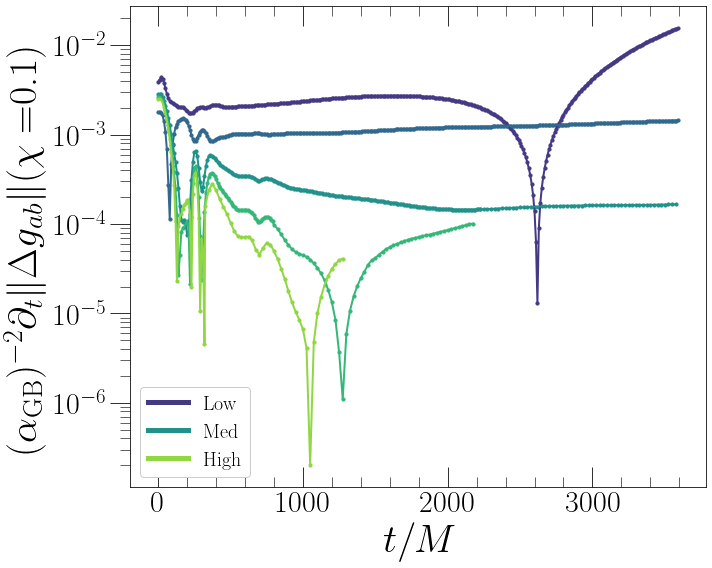

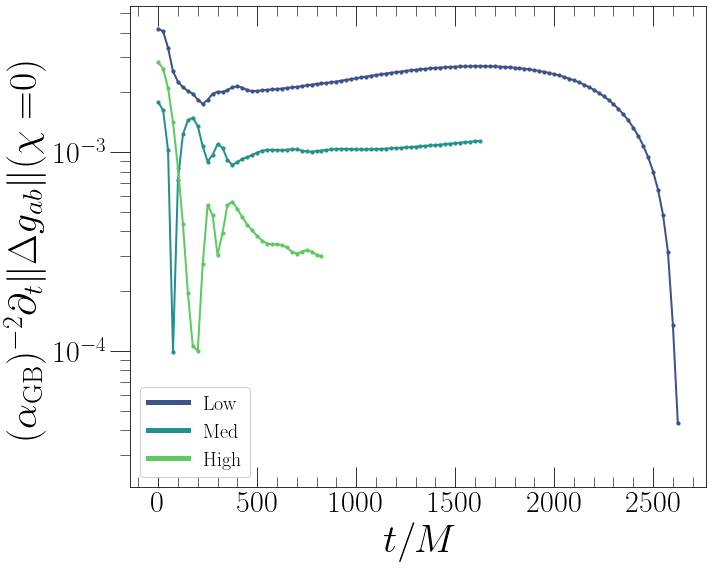

In [ ]:
#PlotManyVariablesRes('Runs_Correct', '0.1', 'Test.pdf')
PlotManyVariablesRes('Runs_Correct_ScalarField', '0.1', 'Resolutions_0p1.pdf', allres=True)
PlotManyVariablesRes('Runs_Correct_ScalarField', '0', 'Resolutions_0.pdf')
PlotManyVariablesRes('Runs_Correct_ScalarField', '0.6', 'Resolutions_0p6.pdf')
PlotManyVariablesRes('Runs_Correct_ScalarField', '0.9', 'Resolutions_0p9.pdf')

In [115]:
## Plot scalar field

def PlotScalarField(p, spin, figname):
    
    levs = ['0','1','2']
    labels = ['Low', 'Med','High']
    
    def GetFilename(lev):
        return p + '/JoinedSpin' + spin + 'Lev' + lev + '/KGVars.dat'
    
    fig, ax = plt.subplots(1, figsize=(8,4))
    
    cmap = matplotlib.cm.get_cmap('magma')
    Colors = [cmap(float(i)/(len(levs))) for i in range(len(levs))]
    Colors = Colors[::-1]
    
    Linestyles = ['-.', '--', '-']
    
    for lev, lab, c, ls in zip(levs, labels, Colors, Linestyles):
        time, KGPsi = np.loadtxt(GetFilename(lev), \
                                                          comments="#",usecols=([0,1]),unpack=True)
        
        ## Factors for the definition of KG Psi
        ##KGPsi = KGPsi / (8.0 * sqrt(8.0 * pi)) ## for dCS
        time, KGPsi = CutTimes(time, KGPsi, 100, 2600)
        ax.plot(time, np.abs(KGPsi), '-', label = lab, c=c, ls=ls)

        
    ax.set_ylabel(r'$(\alpha_\mathrm{GB})^{-1}  \|\vartheta^{(1)} \| $')
    leg = ax.legend(fontsize=16,framealpha=1.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    ax.set_xlabel('$t/M$')

    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

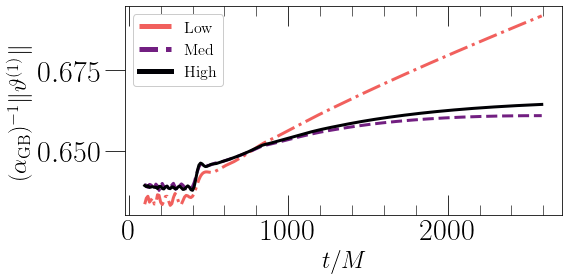

In [116]:
PlotScalarField('Runs_Correct_ScalarField', '0.1', 'ScalarField_0.1.pdf')